# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('train-3.csv')

In [42]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [44]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [45]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [46]:
data = data.fillna('')

In [47]:
data.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [48]:
data.head()

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [114]:
data['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x280a3d1d0>,
 [Text(-0.24110481617711207, 1.0732513534192263, 'Target: 0'),
  Text(0.24110481617711216, -1.0732513534192263, 'Target: 1')])

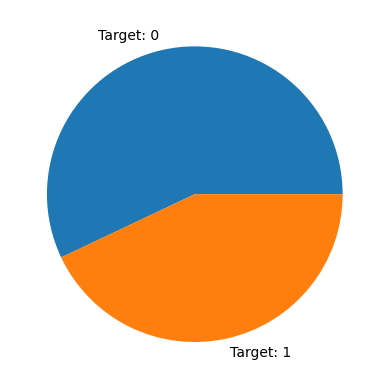

In [51]:
cat_counts = data['target'].value_counts()
plt.pie(cat_counts, labels = ['Target: 0', 'Target: 1'])

In [52]:
cat_counts

target
0    4342
1    3271
Name: count, dtype: int64

In [53]:
data['keyword'].isna().sum()

0

In [75]:
categories_keyword = data.keyword.value_counts()[1:11]

Text(0.5, 1.0, 'Top 10 frequencies from data.keyword')

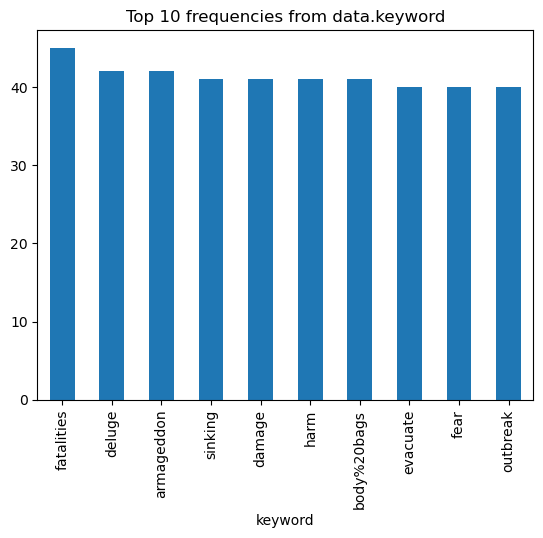

In [76]:
categories_keyword.plot(kind = 'bar')
plt.title('Top 10 frequencies from data.keyword')

In [77]:
import seaborn as sns

/Users/danielzyabkin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/danielzyabkin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/danielzyabkin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/danielzyabkin/anaconda3/lib/python3.11/site-packag

<Axes: xlabel='keyword', ylabel='Count'>

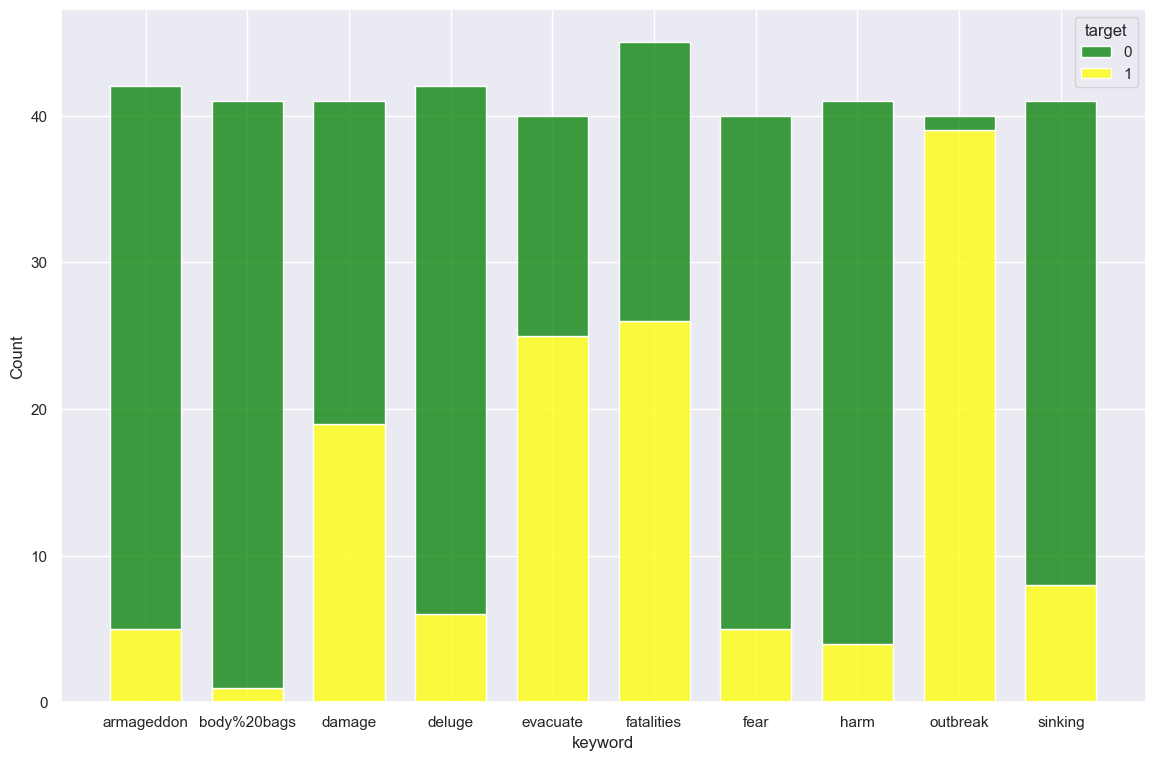

In [96]:
categories_keyword = data.keyword.value_counts()[1:11].index.tolist()
plt.figure(figsize = (14, 9))
sns.histplot(data = data, x = data[data['keyword'].isin(categories_keyword)]['keyword'], hue="target", multiple='stack', shrink=.7, palette = ['green', 'yellow'])


Можно сделать вывод, что если встретилось слово bodybags, fear, harm, deluge, то скорее всего речь идет об инцеденте. Если же встретилось outbreak, то скорее всего не о нем.

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [98]:
data['Full text'] = data['keyword'] + data['location'] + data['text']

In [100]:
data = data.drop(columns = ['id', 'keyword', 'location', 'text'])

In [101]:
data.head()

,target,Full text
0,1,Our Deeds are the Reason of this #earthquake M...
1,1,Forest fire near La Ronge Sask. Canada
2,1,All residents asked to 'shelter in place' are ...
3,1,"13,000 people receive #wildfires evacuation or..."
4,1,Just got sent this photo from Ruby #Alaska as ...


In [103]:
data = data[['Full text', 'target']]
data.head()

,Full text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [104]:
train = data

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
vectorizer = CountVectorizer()

In [108]:
X_vectorized = vectorizer.fit_transform(train['Full text'])

In [113]:
X_vectorized.toarray().shape

(7613, 29622)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [124]:
def isnumber(s):
    for number in '0123456789':
        if number in s:
            return True
    return False

def issign(s):
    for el in '!"#$%&\'()*+,-./:;<=>?@[\$$^_`{|}~«»—–„“”‘’‚‛‹›':
        if el in s:
            return True
    return False

def ishashtag(s):
    if s[0] == '#':
        return True
    else:
        return False

def ismention(s):
    if s[0] == '@':
        return True
    else:
        return False
    
def vocabulary(vocabulary):
    number, sign, hashtag, mention = 0, 0, 0, 0
    for s in vocabulary:
        number += isnumber(s)
        sign += issign(s)
        hashtag += ishashtag(s)
        mention += ismention(s)
    print(f'Слов с цифрами: {number}')
    print(f'Слов со спец. знаками: {sign}')
    print(f'Хештегов: {hashtag}')
    print(f'Упоминаний: {mention}')



In [125]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
vocabulary(dummy_vocab)

Слов с цифрами: 2
Слов со спец. знаками: 7
Хештегов: 1
Упоминаний: 3


In [126]:
vocabulary(vectorizer.vocabulary_)

Слов с цифрами: 6312
Слов со спец. знаками: 440
Хештегов: 0
Упоминаний: 0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [129]:
from nltk.tokenize import TweetTokenizer

tweet = CountVectorizer(tokenizer=TweetTokenizer().tokenize)

In [130]:
X_tweet = tweet.fit_transform(train['Full text'])
X_tweet.toarray().shape

/Users/danielzyabkin/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(7613, 31183)

In [131]:
vocabulary(tweet.vocabulary_)

Слов с цифрами: 6325
Слов со спец. знаками: 10486
Хештегов: 1972
Упоминаний: 2331


TweetTokenizer более информативный, так как обнаружил больше слов с заданными параметрами

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [133]:
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielzyabkin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [135]:
def latin_letters(s: str) -> bool:
    for i in s:
        if i not in 'abcdefghigklmnopqrstuvwxyz':
            return False
    return True

def isemoji(s: str) -> bool:
    if issign(s) and ('(' in s or ')' in s):
        return True
    return False

def ishashtag(s: str) -> bool:
    if s[0] == '#' and latin_letters(s[1:]):
        return True
    return False
    

def custom_tokenizer(s: str):    
    words = TweetTokenizer().tokenize(s)
    res = np.array([])
    for word in words:
        word = word.lower()
        if isemoji(word) or ishashtag(word) or latin_letters(word):
            if word not in nltk.corpus.stopwords.words('english'):
                res = np.append(res, word)
    stemmer = SnowballStemmer('english')
    res_stemmed = [stemmer.stem(w) for w in res]
    return res_stemmed

In [202]:
for row in train.loc[train.index[:10]]['Full text']:
    print(custom_tokenizer(row))

['bridg', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']
['hailcarol', 'stream', 'illinoisgreat', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']
['policehouston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['riotingstil', 'riot', 'coupl', 'hour', 'left', 'class']
['woundslak', 'highlandscrack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee']
['airplan', 'thereexpert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb']
['bloodyisol', 'citi', 'world', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast']
['burn', 'except', 'idk', 'realli', 'burn']
['destroyh', '(', 'ask', ')', 'destroy', 'hous']
['woundedmaracay', 'nirgua', 'venezuelapolic', 'offic', 'wound', 'suspect', 'dead', 'exchang', 'shot']


## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [204]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
train_vec = vectorizer.fit_transform(train['Full text'])
test_vec = vectorizer.transform(test['Full text'])

/Users/danielzyabkin/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [205]:
y_train = train['target']
y_test = test['target']

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(max_iter = 200, random_state = 42)

In [207]:
logreg.fit(train_vec, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [208]:
test_pred = logreg.predict(test_vec)

print(f1_score(y_test, test_pred))

0.7380033094318809


## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(tokenizer=custom_tokenizer)

In [214]:
train_vec = tf_idf.fit_transform(train['Full text'])
test_vec = tf_idf.transform(test['Full text'])

/Users/danielzyabkin/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [215]:
logreg_tf = LogisticRegression(max_iter = 800, random_state = 42)

logreg_tf.fit(train_vec, y_train)

LogisticRegression(max_iter=800, random_state=42)

In [216]:
test_pred = logreg_tf.predict(test_vec)

print(f1_score(y_test, test_pred))

0.7343927355278093


Качество незначительно ухудшилось

In [217]:
vectorizer_td = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)

In [218]:
train_vec1 = vectorizer_td.fit_transform(train['Full text'])
test_vec1 = vectorizer_td.transform(test['Full text'])

/Users/danielzyabkin/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [222]:
logreg_tf1 = LogisticRegression(max_iter = 800, random_state = 42)

logreg_tf1.fit(train_vec1, y_train)

LogisticRegression(max_iter=800, random_state=42)

In [223]:
test_pred1 = logreg_tf1.predict(test_vec1)

print(f1_score(y_test, test_pred1))

0.7343927355278093


In [224]:
print(test_vec1.toarray().shape)

(2284, 13385)


In [225]:
print(test_vec.toarray().shape)

(2284, 13385)


Ничего не изменилось

In [232]:
vectorizer_td = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9, min_df=0.0001) 

train_vec1 = vectorizer_td.fit_transform(train['Full text'])
test_vec1 = vectorizer_td.transform(test['Full text'])

logreg_tf1 = LogisticRegression(max_iter = 800, random_state = 42)
logreg_tf1.fit(train_vec1, y_train)

/Users/danielzyabkin/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


LogisticRegression(max_iter=800, random_state=42)

In [233]:
test_pred1 = logreg_tf1.predict(test_vec1)

print(f1_score(y_test, test_pred1))

0.7343927355278093


## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [234]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer_hash = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000) 

In [236]:
train_vec = vectorizer_hash.fit_transform(train['Full text'])
test_vec = vectorizer_hash.transform(test['Full text'])

/Users/danielzyabkin/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [240]:
logregHash = LogisticRegression(max_iter = 300, random_state = 42)
logregHash.fit(train_vec, y_train)

LogisticRegression(max_iter=300, random_state=42)

In [241]:
y_pred = logregHash.predict(test_vec)
print(f1_score(y_test, y_pred))

0.7091633466135459


## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [246]:
vectorizer = CountVectorizer()
train_vec = vectorizer.fit_transform(train['Full text'])
test_vec = vectorizer.transform(test['Full text'])

In [247]:
lr = LogisticRegression(max_iter = 800, random_state = 42)
lr.fit(train_vec, y_train)

LogisticRegression(max_iter=800, random_state=42)

In [248]:
y_pred = lr.predict(test_vec)

print(f1_score(y_test, y_pred))

0.7529923830250272
